In [2]:
temp3 = Image.open('/opt/ml/input/data/train_dataset/sample.jpg')
ImageOps.invert(temp3.convert("L")).getbbox(), temp3.size

((0, 0, 80, 120), (128, 128))

In [6]:
temp3.size

(128, 128)

In [5]:
temp3.crop(ImageOps.invert(temp3.convert("L")).getbbox()).size

(80, 120)

In [ ]:
'''
https://ponyozzang.tistory.com/600
파이썬의 Pillow (PIL) 라이브러리의 resize 활용
'''

https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=getbbox#PIL.Image.Image.getbbox
`Image.getbbox()`
- 0(검정)이 아닌 영역의 경계 상자 표시
- 튜플 형태 좌표 리턴: (left, upper, right, lower) 

`ImageOps.invert(Image)`
- Invert (negate) the image.
- Image 리턴
- 255 - 본래 값 = 리턴 값

`Image.getbands()`
- e.g. RGB 이미지에서 tuple 형태로 ('R', 'G', 'B') 리턴

`Image.crop((left, upper, right, lower))`
- crop된 Image 리턴

In [1]:
import os
from glob import glob
from PIL import Image, ImageOps
from tqdm import tqdm
import numpy as np

In [2]:
# files = glob('/opt/ml/input/data/train_dataset/images/*')
# file = glob('/opt/ml/input/data/train_dataset/images/train_00000.jpg'):

In [ ]:
glob('/opt/ml/input/data/train_dataset/images/train_00000.jpg'):

In [ ]:
for f in glob('/opt/ml/input/data/train_dataset/images/*'):
    try:
        image = Image.open(f)
        image.convert("L")
        bounding_box = ImageOps.invert(image).getbbox()
        image = image.crop(bounding_box)
        image = image.resize((128, 128))
        name = f.split('/')[-1]
        
        image.save('/opt/ml/input/data/train_dataset/resized_gray_images/'+ name)
    except OSError as e:
        print(f'error at {f}: {e}')

In [34]:
lst = []
for f in glob('/opt/ml/input/data/train_dataset/images/*'):
    temp_image = Image.open(f)
    if ImageOps.invert(temp_image).getbbox() != (0, 0, temp_image.size[0], temp_image.size[1]):
        print(f.split('/')[-1])
        lst.append(f.split('/')[-1])

train_19617.jpg
train_92532.jpg


In [36]:
temp = Image.open('/opt/ml/input/data/train_dataset/images/' + 'train_19617.jpg')
ImageOps.invert(temp).getbbox(), temp.size

((12, 0, 4568, 609), (4568, 609))

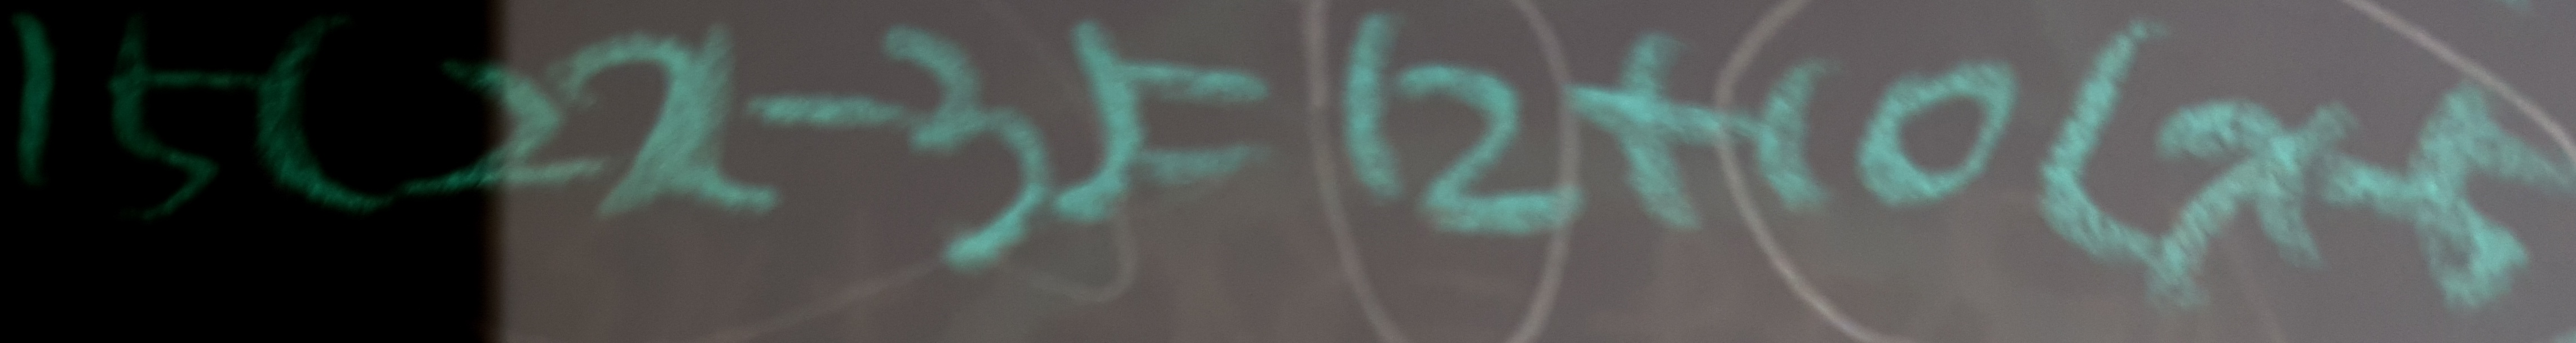

In [38]:
ImageOps.invert(temp)

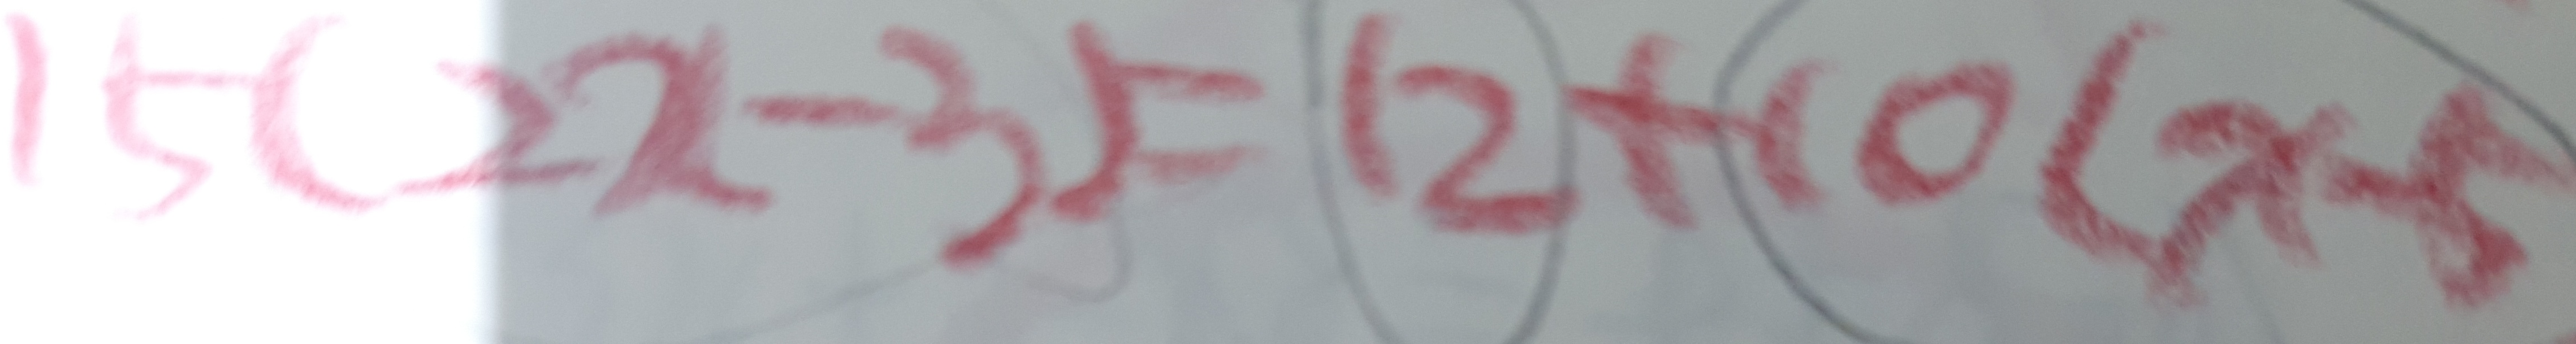

In [39]:
temp.crop(ImageOps.invert(temp).getbbox())

In [40]:
temp = Image.open('/opt/ml/input/data/train_dataset/images/' + 'train_92532.jpg')
ImageOps.invert(temp).getbbox(), temp.size

((0, 8, 795, 291), (795, 291))

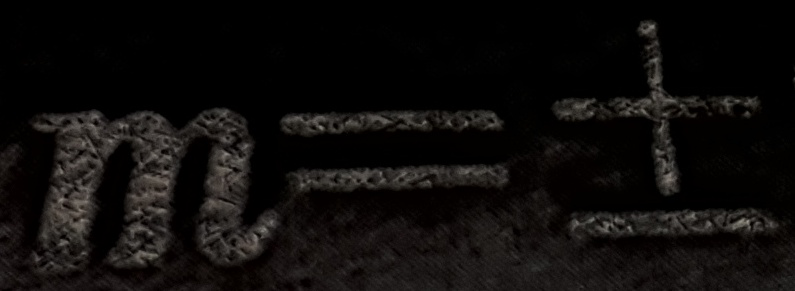

In [41]:
ImageOps.invert(temp)

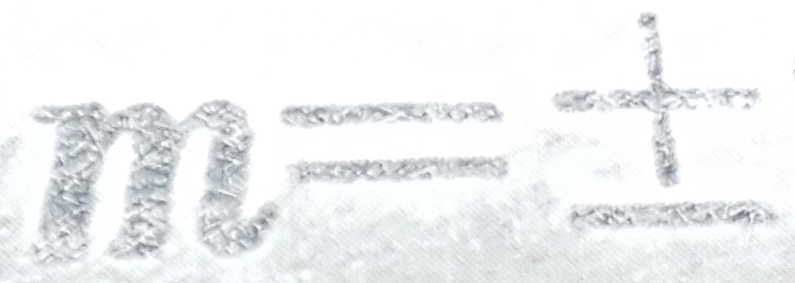

In [42]:
temp.crop(ImageOps.invert(temp).getbbox())

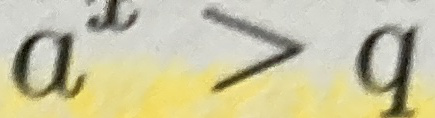

In [5]:
image

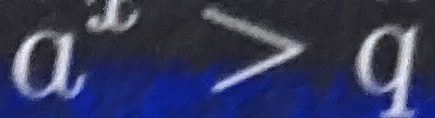

In [19]:
ImageOps.invert(image)

In [32]:
np.array(image)[:][0]

array([[205, 206, 200],
       [195, 196, 190],
       [202, 203, 197],
       ...,
       [215, 216, 210],
       [215, 216, 210],
       [216, 217, 211]], dtype=uint8)

In [20]:
np.array(ImageOps.invert(image))

array([[[ 50,  49,  55],
        [ 60,  59,  65],
        [ 53,  52,  58],
        ...,
        [ 40,  39,  45],
        [ 40,  39,  45],
        [ 39,  38,  44]],

       [[ 45,  44,  50],
        [ 44,  43,  49],
        [ 49,  48,  54],
        ...,
        [ 41,  40,  46],
        [ 40,  39,  45],
        [ 40,  39,  45]],

       [[ 39,  38,  44],
        [ 36,  35,  41],
        [ 42,  41,  47],
        ...,
        [ 42,  41,  47],
        [ 41,  40,  46],
        [ 40,  39,  45]],

       ...,

       [[ 22,  34, 110],
        [ 22,  34, 110],
        [ 22,  34, 110],
        ...,
        [ 17,  32, 133],
        [ 17,  32, 133],
        [ 17,  32, 133]],

       [[ 22,  34, 110],
        [ 22,  34, 110],
        [ 22,  34, 110],
        ...,
        [ 17,  32, 133],
        [ 17,  32, 133],
        [ 16,  31, 132]],

       [[ 22,  34, 110],
        [ 22,  34, 110],
        [ 22,  34, 110],
        ...,
        [ 17,  32, 133],
        [ 17,  32, 133],
        [ 16,  31, 132]]

In [33]:
image.size[0]

435

In [13]:
bbox = ImageOps.invert(image).getbbox()
bbox

(0, 0, 435, 118)

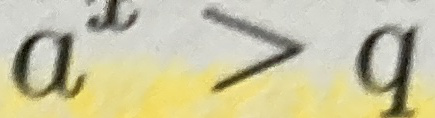

In [15]:
croped = image.crop(bbox)
croped

In [18]:
np.array(croped).shape

(118, 435, 3)

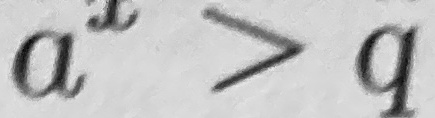

In [4]:
image.convert("L")

In [ ]:
for f in tqdm(glob('/opt/ml/input/data/train_dataset/resized_gray_images/*')):
    image = Image.open(f)
    if image.size != (128,128):
        print(f)
